# Establish Relations 

In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader
#Import numpy for array calculation
import numpy as np

import re

#import nltk for string operations
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [2]:
# Load the model
model = gensim.downloader.load('glove-wiki-gigaword-50')
dims = 50

In [3]:
# Prepared a country-capital tuple list
country_capital_tuples = [
("india", "delhi"),
("afghanistan", "kabul"),
("angola", "luanda"),
("australia", "canberra"),
("brazil", "brasilia"),
("canada", "ottawa"),
("denmark", "copenhagen"),
("egypt", "cairo"),
("england", "london"),
("greece", "athens"),
("indonesia", "jakarta"),
("iran", "tehran"),
("ireland", "dublin"),
("japan", "tokyo"),
("russia", "moscow"),
("spain", "madrid"),
("chile", "santiago")
]

In [4]:
# created a separate list for country-capital word vectors
country_capital_vectors = []

for tup in country_capital_tuples:
    country_vec = model.get_vector(tup[0])
    capital_vec = model.get_vector(tup[1])
    country_capital_vectors.append((country_vec, capital_vec))


## Relation Visualisation

### Reduction to 3 - dimensions

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [6]:
# Reduced dimensionality of word vectors to two

vec_3d = []
start_idx = 0
end_idx = 3
for tup in country_capital_vectors:
    vec_3d.append((tup[0][start_idx:end_idx], tup[1][start_idx:end_idx]))

In [7]:
# plot country points
x1 = np.array([a[0] for a,b in vec_3d])
y1 = np.array([a[1] for a,b in vec_3d])
z1 = np.array([a[2] for a,b in vec_3d])
#capital points
x2 = np.array([b[0] for a,b in vec_3d])
y2 = np.array([b[1] for a,b in vec_3d])
z2 = np.array([b[2] for a,b in vec_3d])

<IPython.core.display.Javascript object>


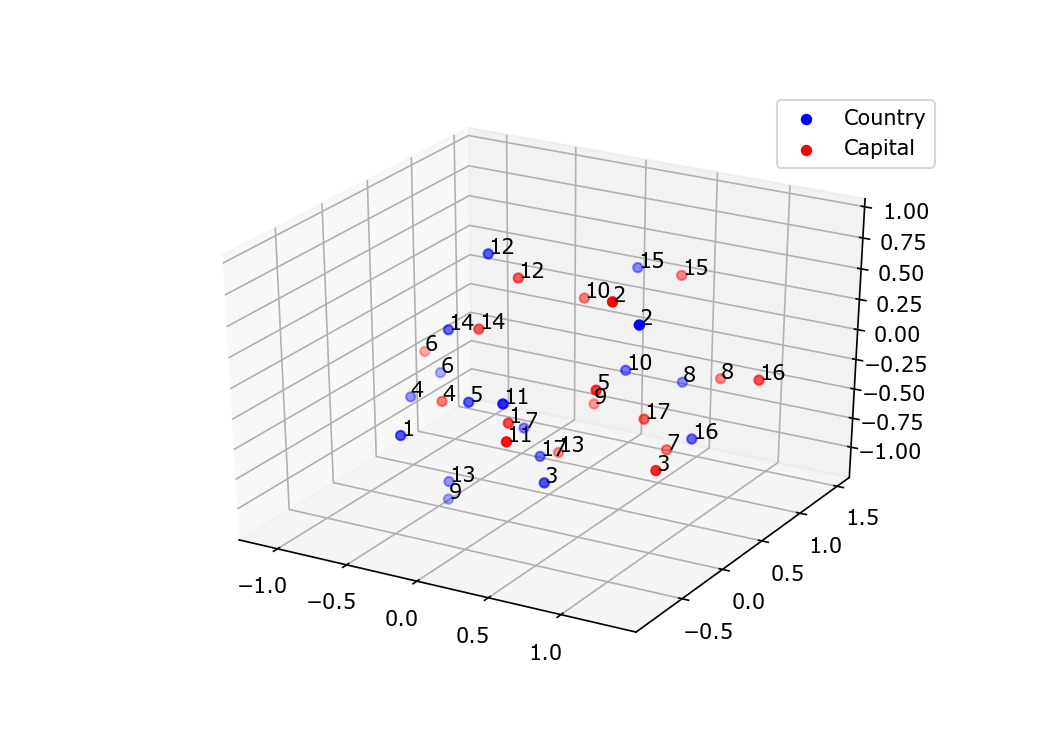

In [8]:
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1,y1,z1, color = 'blue' )
for i in range(len(x1)):
    ax.text(x1[i],y1[i],z1[i], str(i+1))

ax.scatter3D(x2,y2,z2,color = 'red')
for i in range(len(x1)):
    ax.text(x2[i],y2[i],z2[i], str(i+1))

plt.legend(["Country", "Capital"])

plt.show()

### Reduction using PCA

In [9]:
# Check if all the dimensions are on the same scale
# if yes, no need of standardization
model.get_vector("earth")

array([ 1.0828   ,  0.8278   ,  1.0101   ,  0.012863 ,  0.8429   ,
       -0.27394  , -0.0047314, -0.47085  ,  0.33517  ,  0.042372 ,
        0.59308  ,  0.16438  ,  0.28729  ,  1.2204   , -0.034446 ,
        0.77297  ,  0.70817  ,  0.502    , -1.373    , -0.29783  ,
       -0.21993  ,  0.27519  ,  0.89638  , -0.73123  ,  1.439    ,
       -0.61846  , -0.90979  ,  0.28174  ,  0.79897  ,  0.21661  ,
        2.5256   , -0.54832  , -0.66141  , -0.94656  , -0.79848  ,
       -0.083708 , -0.44645  , -0.088577 ,  0.1127   ,  0.15461  ,
       -0.41408  , -0.47965  ,  0.22811  , -0.025582 , -0.58716  ,
        0.34786  ,  0.57678  , -1.2095   , -0.60164  , -0.89549  ],
      dtype=float32)

In [10]:
# creating a separate list of country & capital vectors
country_vecs, capital_vecs = [], []

for country_vec, capital_vec in country_capital_vectors:
    country_vecs.append(country_vec)
    capital_vecs.append(capital_vec)

In [11]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca_dims_country = pca1.fit_transform(country_vecs)
pca2 = PCA()
pca_dims_capital = pca2.fit_transform(capital_vecs)

In [12]:
print("Variance in country pca vectors:")
print(pca1.explained_variance_ratio_)
print("Variance in capital pca vectors:")
print(pca2.explained_variance_ratio_)

Variance in country pca vectors:
[2.43735345e-01 2.01706234e-01 1.60144937e-01 1.08363583e-01
 6.30007974e-02 4.60309688e-02 4.23814590e-02 2.91882733e-02
 2.44798877e-02 1.98943250e-02 1.95382025e-02 1.35636167e-02
 1.32061945e-02 8.37860714e-03 4.35182132e-03 2.03574658e-03
 5.60450096e-33]
Variance in capital pca vectors:
[2.36756686e-01 1.72126022e-01 1.31975534e-01 1.07049886e-01
 7.90282417e-02 5.65134597e-02 4.83561533e-02 3.75125791e-02
 2.71616927e-02 2.41236542e-02 2.26944770e-02 1.78743836e-02
 1.64410180e-02 1.03739003e-02 6.52140713e-03 5.49090486e-03
 4.80256538e-33]


Even after applying PCA, there are 15 dimensions, most of the variance is explained by the first 4 variables. Visualisation will be easier with the first 3 variables, which together explain ~ 64% variance in country vectors

In [13]:
# country points
x1 = np.array([a[0] for a in pca_dims_country])
y1 = np.array([a[1] for a in pca_dims_country])
z1 = np.array([a[2] for a in pca_dims_country])
# capital points
x2 = np.array([a[0] for a in pca_dims_capital])
y2 = np.array([a[1] for a in pca_dims_capital])
z2 = np.array([a[2] for a in pca_dims_capital])

<IPython.core.display.Javascript object>


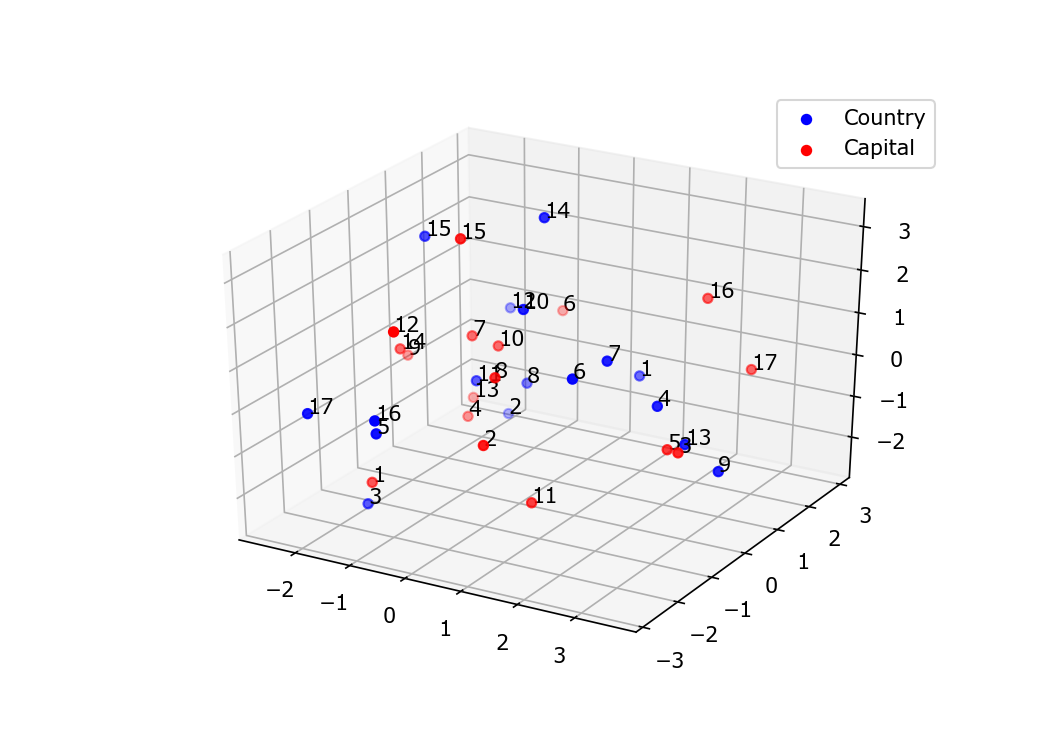

In [14]:
# 3d plotting of the points
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1,y1,z1, color = 'blue' )
for i in range(len(x1)):
    ax.text(x1[i],y1[i],z1[i], str(i+1))

ax.scatter3D(x2,y2,z2,color = 'red')
for i in range(len(x1)):
    ax.text(x2[i],y2[i],z2[i], str(i+1))

plt.legend(["Country", "Capital"])

plt.show()

PCA doesn't work and gives really bad results

## Multivariate Multiple Linear Regression

Since we want to establish a relationship between each country vector and capital vector with each vector having 50 dimensions, we'll have to regress separately on each dimension of the dependent variable.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model.get_vector("india") # y1 = ax + bx2 + cx3 + c

array([-0.20356 , -0.8707  , -0.19172 ,  0.73862 ,  0.18494 ,  0.14926 ,
        0.48079 , -0.21633 ,  0.72753 , -0.36912 ,  0.13397 , -0.1143  ,
       -0.18075 , -0.64683 , -0.18484 ,  0.83575 ,  0.48179 ,  0.76026 ,
       -0.50381 ,  0.80743 ,  1.2195  ,  0.3459  ,  0.22185 ,  0.31335 ,
        1.2066  , -1.8441  ,  0.14064 , -0.99715 , -1.1402  ,  0.32342 ,
        3.2128  ,  0.42708 ,  0.19504 ,  0.80113 ,  0.38555 , -0.12568 ,
       -0.26533 ,  0.055264, -1.1557  ,  0.16836 , -0.82228 ,  0.20394 ,
        0.089235, -0.60125 , -0.032878,  1.3735  , -0.51661 ,  0.29611 ,
        0.23951 , -1.3801  ], dtype=float32)

In [17]:
# create a coefficients array
coeff = []
intercepts = []
avg_score = 0
# regressing a linear model on each independent dimension of response variable
for i in range(dims):
    y = [x[i] for x in country_vecs]
    x = capital_vecs
    regr = LinearRegression()
    regr.fit(x, y)
    coeff.append(regr.coef_)
    intercepts.append(regr.intercept_)
    avg_score += regr.score(x,y)
print("Model score: ", avg_score/dims)

Model score:  0.9999999999995564


Each list in coeff represent the coefficients of that particular dimension

In [18]:
# Predicting country vectors from the coefficients
country_vecs_pred = []
for cap_vec in capital_vecs:
    country_vec = []
    for i in range(dims):
        country_vec.append(sum([a*b for a,b in zip(cap_vec,coeff[i])]) + intercepts[i])
    country_vecs_pred.append(np.array(country_vec))

Plotting the predicted and actual values in 3d space

<IPython.core.display.Javascript object>


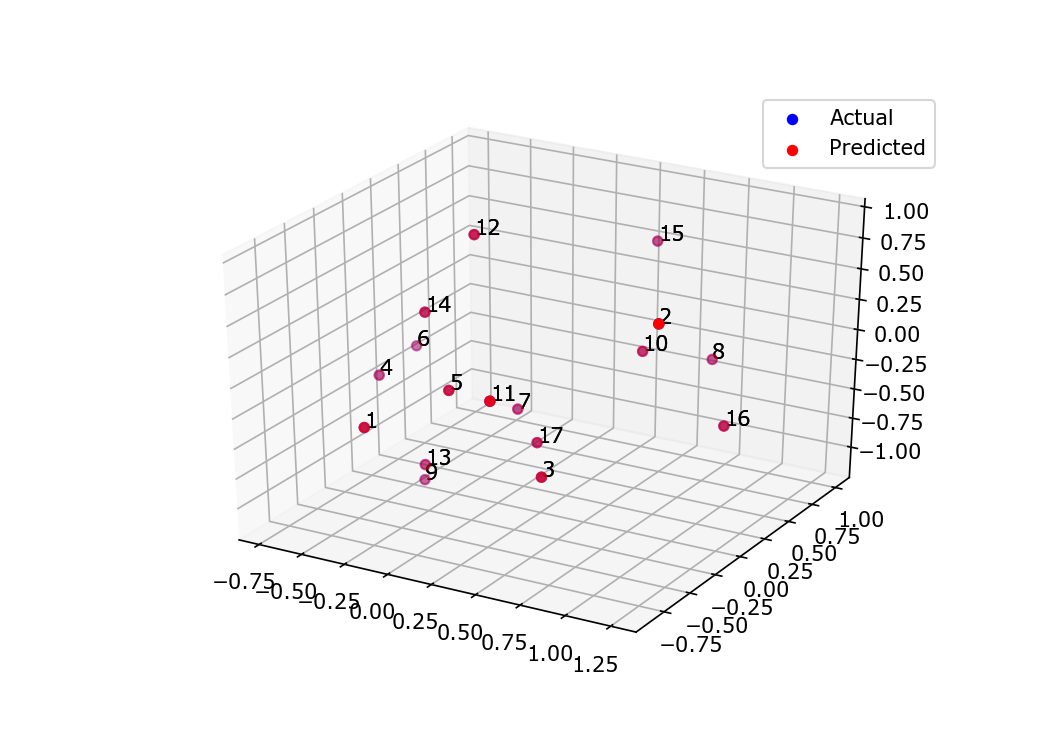

In [19]:
# actual points
x1 = np.array([a[0] for a in country_vecs])
y1 = np.array([a[1] for a in country_vecs])
z1 = np.array([a[2] for a in country_vecs])
# predicted points
x2 = np.array([a[0] for a in country_vecs_pred])
y2 = np.array([a[1] for a in country_vecs_pred])
z2 = np.array([a[2] for a in country_vecs_pred])

# 3d plotting of the points
fig = plt.figure(figsize = (7,5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1,y1,z1, color = 'blue')
for i in range(len(x1)):
    ax.text(x1[i],y1[i],z1[i], str(i+1))

ax.scatter3D(x2,y2,z2,color = 'red')
for i in range(len(x1)):
    ax.text(x2[i],y2[i],z2[i], str(i+1))

plt.legend(["Actual", "Predicted"])

plt.show()

The model predicts actual values almost perfectly

**Testing on country-capital pairs outside the training set**

In [20]:
country_vec = []
cap_vec = model.get_vector("beijing")
for i in range(dims):
    country_vec.append(sum([a*b for a,b in zip(cap_vec,coeff[i])]) + intercepts[i])
np.array(country_vec)

array([-4.08222781e-02,  4.96990832e-03, -2.64048617e-03,  6.71431485e-01,
       -2.23866052e-01, -3.82326953e-01,  8.05707377e-01,  1.80544784e-01,
       -4.97536313e-01,  3.82427148e-01,  7.38580170e-01,  1.13220159e-01,
        6.17736322e-01,  1.80143517e-01, -6.34996891e-02,  7.05695629e-01,
       -2.32335564e-01,  8.17413436e-01, -5.12645891e-01,  1.00795256e+00,
        9.17754896e-01, -3.84385534e-01,  5.10732627e-02, -7.23914542e-01,
        8.49673141e-01, -1.99332483e+00,  4.63118749e-01, -2.76957180e-02,
       -5.21213056e-01, -4.37630133e-01,  2.84689449e+00,  3.86728133e-01,
        2.08674203e-01,  4.95192195e-01, -1.95664684e-01, -1.02048705e-01,
       -2.35291729e-01,  5.03977340e-01, -6.68821502e-01,  6.90784934e-03,
       -6.07063587e-01, -3.83238799e-01,  1.44152851e+00, -8.57036458e-01,
        2.87463132e-01,  1.35807067e+00, -2.25492015e-01,  9.54934424e-01,
       -1.76898439e-01, -1.25337837e+00])

In [21]:
model.get_vector("cuba")

array([-0.093604 ,  0.50806  , -0.17568  ,  0.61962  , -0.65162  ,
       -1.0921   , -0.11877  ,  0.42463  ,  0.31752  ,  0.80837  ,
        0.5214   , -0.0092062,  0.52537  ,  0.33207  ,  0.69942  ,
       -0.67507  , -0.5808   , -0.67245  ,  0.23742  ,  0.48976  ,
       -0.90103  ,  0.12241  ,  0.032081 , -0.50658  ,  0.070364 ,
       -1.8252   ,  1.1578   , -0.31298  ,  0.50013  , -0.15252  ,
        2.0478   ,  0.040124 , -0.96593  , -0.25804  , -0.96169  ,
       -0.68567  , -0.51045  ,  0.42022  , -0.80896  ,  0.23058  ,
       -0.57546  ,  0.37642  ,  1.8614   , -0.80437  , -0.1745   ,
        0.33694  , -0.77838  , -0.61114  , -0.76292  , -0.30031  ],
      dtype=float32)

In [22]:
np.linalg.norm(country_vec-model.get_vector("china"))

3.398077306777233